In [1]:
import geopandas as gp
import matplotlib.pyplot as plt
from shapely.geometry import *
import pandas as pd
import numpy as np

In [3]:
cousub = pd.read_csv('/Users/mhardika/Documents/AMO/GeoToolAll_Methods/Water Source Data/Domestic/Census Data/cousub_pop_files/DECENNIALPL2020.P1_2023-07-17T155825/county_subdivision_data_2020.csv',encoding='utf-8')
cousub.head()

,GEO_ID,NAME,POP
0,0600000US0100190171,"Autaugaville CCD, Autauga County, Alabama",3185
1,0600000US0100190315,"Billingsley CCD, Autauga County, Alabama",2645
2,0600000US0100192106,"Marbury CCD, Autauga County, Alabama",6359
3,0600000US0100192628,"Prattville CCD, Autauga County, Alabama",46616
4,0600000US0100390207,"Bay Minette CCD, Baldwin County, Alabama",25186


Cleaning data set to separate county subdivision name, county name and state name

In [4]:
# Separate data set into 2 : 2 ',' and 3 ','
idx_list= []
for index,row in cousub.iterrows():
    if cousub.loc[index]['NAME'].count(',') > 2:
        idx_list.append(index)

cousub_weird = cousub.loc[idx_list]
cousub_weird.head()
cousub.drop(index=idx_list,inplace=True) 

tmpDF1 = pd.DataFrame(columns=['subdiv','county','state'])
tmpDF2 = pd.DataFrame(columns=['subdiv','county','state'])

# some line items have more that ','
for index,row in cousub_weird.iterrows():
    temp = cousub_weird.loc[index]['NAME'].split(", ")
    temp = [temp[0]+' '+ temp[1],temp[2],temp[3]]
    temp = pd.DataFrame([temp],columns=['subdiv','county','state'])
    tmpDF2= pd.concat([tmpDF2,temp])
    tmpDF2.reset_index()    
tmpDF2['pop'] = cousub_weird['POP']

tmpDF1[['subdiv','county','state']] = cousub['NAME'].str.split(", ",expand=True)
tmpDF1['pop'] = cousub['POP']

cousub_df = pd.concat([tmpDF1,tmpDF2])

# cousub_df.head()

Compare population in AZ, TX, CA and VA

In [5]:
df = pd.read_csv(r'\Users\mhardika\Documents\AMO\GeoToolAll_Methods\Water Source Data\Domestic\Census Data\co-est2022-alldata.csv')

In [6]:
county_list = county_pop_calc.county.unique()
county_list

NameError: name 'county_pop_calc' is not defined

ValueError: shape mismatch: objects cannot be broadcast to a single shape

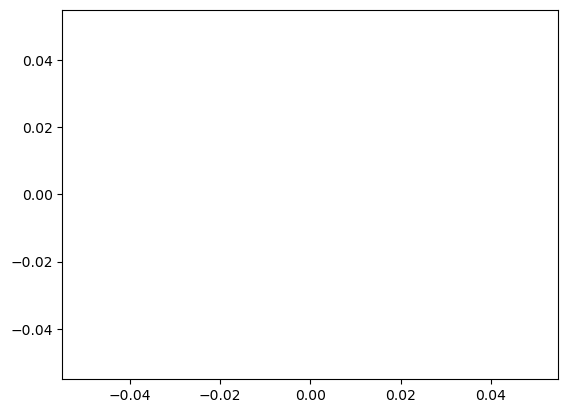

In [13]:
county_pop_calc = pd.DataFrame(columns = ['county','population'])
state_cousub_df = cousub_df[cousub_df['state'] == 'Arizona']
# state_cousub_df = cousub_df[cousub_df['state'] == 'California']
# state_cousub_df = cousub_df[cousub_df['state'] == 'Albama']
# state_cousub_df = cousub_df[cousub_df['state'] == 'Colorado']

for county in state_cousub_df.county.unique():
    temp = {'county': county,
            'population':state_cousub_df[state_cousub_df['county']==county]['pop'].sum()}

    temp = pd.DataFrame([temp])
    county_pop_calc= pd.concat([county_pop_calc,temp])

county_pop_calc.reset_index()
county_pop_calc= county_pop_calc.sort_values(by=['county'])


df1 = df[(df['STATE']==4) & (df['COUNTY']!=0)].groupby('CTYNAME').first()
# df1 = df[(df['STATE']==6) & (df['COUNTY']!=0)].groupby('CTYNAME').first()
# df1 = df[(df['STATE']==1) & (df['COUNTY']!=0)].groupby('CTYNAME').first()
# df1 = df[(df['STATE']==8) & (df['COUNTY']!=0)].groupby('CTYNAME').first()

county_list = county_pop_calc.county.unique()
fig,ax = plt.subplots()
x = np.array(range(0,len(county_list)))


ax.bar(x-0.125, county_pop_calc['population'], width = 0.25,label='CCD')
ax.bar(x+0.125, df1.sort_values(by=['CTYNAME'])['POPESTIMATE2020'], width = 0.25, label = 'County level Census')
ax.legend()

# ax.set_xticks(range(0,len(county_list)),county_list,rotation = 90)

frac = sum(county_pop_calc['population'])/sum(df1['POPESTIMATE2020'])
print(frac*100)

County subdivision mapping

<AxesSubplot: >

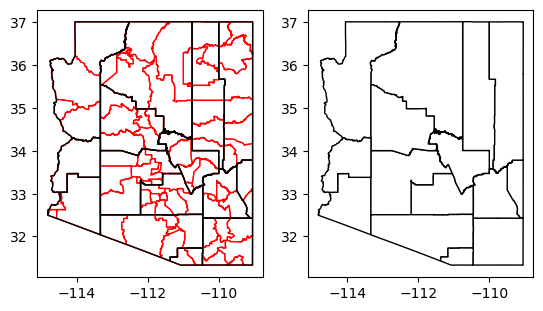

In [27]:
us_counties = gp.read_file(r'\Users\mhardika\Documents\AMO\GeoToolAll_Methods\GeoData\US_County_Boundaries\US_CountyBndrys.shp')
us_counties = us_counties.to_crs("EPSG:4326")

az = us_counties.loc[us_counties['STATEFP']=='04']
az_cousub = gp.read_file(r'\Users\mhardika\Downloads\tl_rd22_04_cousub\tl_rd22_04_cousub.shp' )
az_cousub  =az_cousub .to_crs("EPSG:4326")

fig, (ax,ax0) = plt.subplots(1,2)

# All places
az_cousub.plot(ax=ax,figsize=(50, 50),color = 'white',edgecolor ='red')
az.plot(ax=ax,figsize=(50, 50),facecolor ='none',edgecolor ='black')

az.plot(ax=ax0,figsize=(50, 50),color = 'white',edgecolor ='black')